In [78]:
# 数据处理
import pandas as pd
import numpy as np
 
# 绘图
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
## 读取数据
df = pd.read_csv("problem2PCA.csv",encoding="gb2312")
df.head()


,类型,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),sum
0,高钾,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,97.22
1,铅钡,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00,99.89
2,高钾,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,100.00
3,高钾,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,98.88
4,高钾,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,95.70


In [80]:
## labelencoder
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
df["类型"] = LabelEncoder().fit_transform(np.array(df["类型"])).reshape(-1,1)
df = df.drop('sum',axis=1)
df = df.drop("类型",axis=1)
df.head()

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00
4,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36


In [81]:
# 数据归一化
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df = mms.fit_transform(df[:len(df)-2])
df


array([[0.67472736, 0.        , 0.68801653, 0.72643678, 0.31868132,
        0.25053996, 0.28807947, 0.36613056, 0.        , 0.        ,
        0.08280255, 0.        , 0.        , 0.10655738],
       [0.28295401, 0.        , 0.07231405, 0.26896552, 0.43223443,
        0.38012959, 0.30794702, 0.02459792, 0.67554479, 0.        ,
        0.25265393, 0.16964286, 0.        , 0.        ],
       [0.88477952, 0.        , 0.35743802, 0.23103448, 0.        ,
        0.25989921, 0.        , 0.07379376, 0.00356075, 0.        ,
        0.04670913, 0.        , 0.        , 0.        ],
       [0.58440019, 0.        , 0.85192837, 0.67471264, 0.40659341,
        0.36357091, 0.35761589, 0.48155156, 0.02008261, 0.08868217,
        0.04953999, 0.08928571, 0.        , 0.        ],
       [0.6338312 , 0.        , 0.66597796, 0.8183908 , 0.57142857,
        0.4312455 , 0.3410596 , 0.20624409, 0.        , 0.        ,
        0.05590941, 0.        , 0.        , 0.09836066],
       [0.58285917, 0.        , 0.7

In [82]:
# PCA降维
from sklearn.decomposition import PCA
from sklearn import preprocessing
pca = PCA()
pca.fit(df)

PCA()

In [83]:
pca.score

<bound method PCA.score of PCA()>

In [84]:
pca.components_ # 模型的各个特征向量

array([[-4.54617723e-01, -3.09374242e-02, -3.92868082e-01,
        -2.00648040e-01, -1.02259942e-01, -2.23133184e-01,
        -1.44096037e-01,  7.05694692e-02,  5.01927261e-01,
         2.87272948e-01,  2.15980115e-01,  3.54791702e-01,
        -4.38045177e-02,  5.35843685e-02],
       [-3.44720580e-01, -1.30405695e-01,  2.69288630e-01,
         5.35332509e-01,  3.93468048e-01,  2.37727449e-01,
         2.83421083e-01, -1.45282924e-02,  1.74932146e-01,
        -1.15820929e-01,  3.74690726e-01,  1.57974247e-01,
         1.58825686e-02, -5.98145972e-02],
       [-1.41289441e-01,  9.79423180e-03,  3.21998907e-01,
         2.62121809e-01, -2.68309480e-01, -1.08409459e-01,
         1.61851718e-02,  6.30556177e-01, -1.77619624e-01,
         4.10817432e-01, -9.26667266e-02, -2.57022206e-02,
        -9.23732076e-02,  3.28396647e-01],
       [-1.53879124e-01,  7.37196145e-01,  6.96727436e-02,
        -2.84089676e-02,  2.22150931e-01,  3.71484722e-01,
        -1.06058858e-01, -2.53636211e-02,  7.

In [85]:
pca.explained_variance_  # 贡献方差，即特征根

array([2.49306421e-01, 1.54355309e-01, 9.11095597e-02, 5.73140759e-02,
       5.38441838e-02, 3.09225609e-02, 2.89335781e-02, 2.29306171e-02,
       2.10931445e-02, 1.89253436e-02, 1.47784600e-02, 1.19233283e-02,
       7.76866571e-03, 1.90287618e-04])

In [86]:
pca.explained_variance_ratio_ #各个成分各自的方差百分比（贡献率）

array([3.26575686e-01, 2.02195718e-01, 1.19347777e-01, 7.50778245e-02,
       7.05324846e-02, 4.05066043e-02, 3.79011624e-02, 3.00376621e-02,
       2.76306889e-02, 2.47910064e-02, 1.93588505e-02, 1.56188080e-02,
       1.01764621e-02, 2.49264778e-04])

Text(0.5, 1.0, 'PVE')

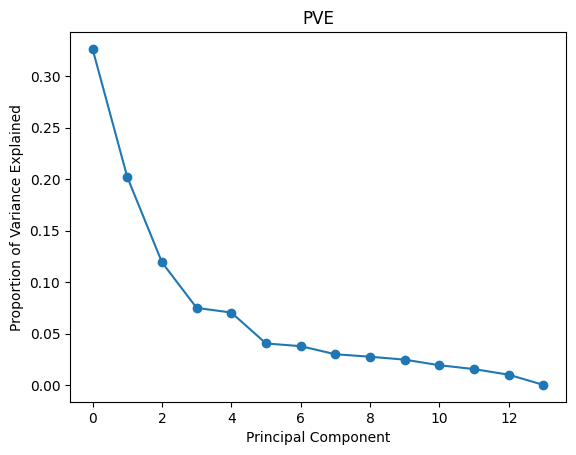

In [87]:
#可视化
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('PVE')

Text(0.5, 1.0, 'Cumulative PVE')

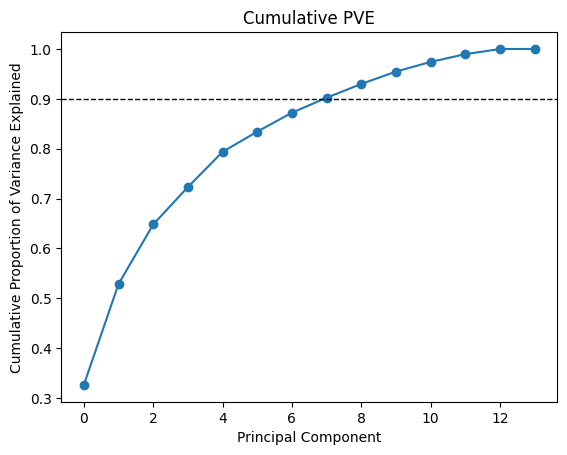

In [88]:
# 画累计百分比，这样可以判断选几个主成分
plt.plot(pca.explained_variance_ratio_.cumsum(), 'o-')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.axhline(0.9, color='k', linestyle='--', linewidth=1)
plt.title('Cumulative PVE')

In [95]:
df = pd.DataFrame(df)

In [98]:
#主成分核载矩阵pca.components_,该矩阵展示了每个主成分是原始数据的线性组合，以及线性的系数
 
columns = ['PC' + str(i) for i in range(1, 15)]
 
pca_loadings = pd.DataFrame(pca.components_, columns=df.columns.values, index=columns)
round(pca_loadings, 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
PC1,-0.45,-0.03,-0.39,-0.20,-0.10,-0.22,-0.14,0.07,0.50,0.29,0.22,0.35,-0.04,0.05
PC2,-0.34,-0.13,0.27,0.54,0.39,0.24,0.28,-0.01,0.17,-0.12,0.37,0.16,0.02,-0.06
PC3,-0.14,0.01,0.32,0.26,-0.27,-0.11,0.02,0.63,-0.18,0.41,-0.09,-0.03,-0.09,0.33
PC4,-0.15,0.74,0.07,-0.03,0.22,0.37,-0.11,-0.03,0.01,0.20,-0.35,0.25,0.04,-0.09
PC5,0.11,-0.20,-0.29,-0.39,0.44,0.36,0.15,0.26,-0.32,0.27,0.24,0.03,0.13,0.20
PC6,0.04,-0.28,0.44,-0.15,0.22,-0.18,-0.39,-0.03,0.04,-0.05,-0.18,0.37,0.53,0.12
PC7,0.08,0.41,0.12,-0.04,0.10,-0.23,-0.46,0.11,-0.21,-0.13,0.67,-0.09,-0.06,-0.03
PC8,0.30,0.02,-0.00,-0.05,0.01,-0.18,0.24,0.19,-0.16,-0.26,-0.02,0.72,-0.40,-0.08
PC9,0.05,-0.16,-0.02,0.09,-0.48,0.65,-0.37,-0.13,-0.04,-0.12,0.16,0.25,-0.08,0.23
PC10,0.10,-0.06,-0.31,0.34,0.43,-0.10,-0.37,-0.01,0.09,-0.14,-0.27,-0.08,-0.33,0.49


In [106]:
pca_loadings.loc['PC' + str(1)]

0    -0.454618
1    -0.030937
2    -0.392868
3    -0.200648
4    -0.102260
5    -0.223133
6    -0.144096
7     0.070569
8     0.501927
9     0.287273
10    0.215980
11    0.354792
12   -0.043805
13    0.053584
Name: PC1, dtype: float64

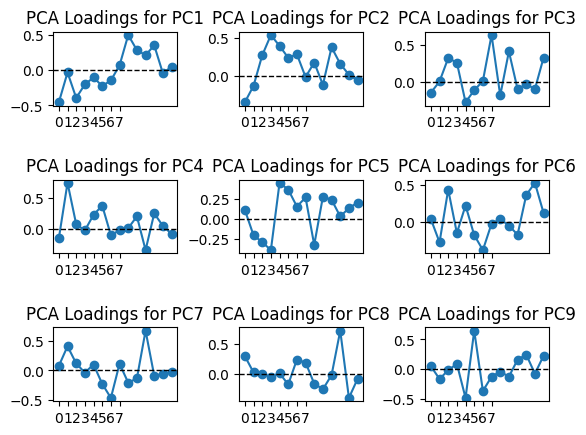

In [111]:
# Visualize pca loadings
 
fig, ax = plt.subplots(3, 3)
plt.subplots_adjust(hspace=1, wspace=0.5)   
for i in range(1, 10):
    ax = plt.subplot(3, 3, i)
    ax.plot(pca_loadings.loc['PC' + str(i)], 'o-')
    ax.axhline(0, color='k', linestyle='--', linewidth=1)
    ax.set_xticks(range(8))
    # ax.set_xticklabels(pca.columns, rotation=30)
    ax.set_title('PCA Loadings for PC' + str(i))

In [ ]:
pca = PCA(7) #确定7个主成分
pca.fit(df)
low_d = pca.transform(df)# low_d降维后的结果
low_d
# https://zhuanlan.zhihu.com/p/452381311

array([[-7.35807012e-01,  2.67593108e-01,  3.79749917e-01],
       [ 1.38725304e-01,  2.93012959e-01, -3.17698308e-01],
       [-5.62362203e-01, -3.66136084e-01, -2.30175907e-02],
       [-7.30505666e-01,  3.95930303e-01,  4.68456739e-01],
       [-8.18339290e-01,  4.75140974e-01,  2.14970612e-01],
       [-8.43170993e-01,  6.14434244e-01,  3.02609388e-01],
       [-6.03388629e-01,  2.50152614e-01, -1.50970579e-01],
       [-7.51063858e-01,  7.49439294e-01,  4.73523578e-02],
       [-3.87097235e-01, -5.75984296e-01, -1.13770826e-02],
       [ 7.40052854e-01, -2.34980136e-01,  1.08337973e+00],
       [-4.13795657e-01, -6.11326951e-01, -1.09413122e-01],
       [-4.23165286e-01, -6.57435398e-01, -1.53618990e-01],
       [ 4.09365183e-01,  2.19023657e-01,  2.46588793e-01],
       [-4.27454622e-01, -5.98853908e-01, -8.97594894e-02],
       [-8.43850544e-01,  4.30339368e-01,  6.15415418e-01],
       [-8.98010703e-01,  3.90527357e-01,  2.44404110e-01],
       [-9.09560013e-01,  3.65213264e-01

In [ ]:
# 求指标在不同主成分线性组合中的系数
k1_spss = pca.components_ / np.sqrt(pca.explained_variance_.reshape(-1, 1))  #成分得分系数矩阵
j = 0
Weights = []
for j in range(len(k1_spss)):
    for i in range(len(pca.explained_variance_)):
        Weights_coefficient = np.sum(100 * (pca.explained_variance_ratio_[i]) * (k1_spss[i][j])) / np.sum(
            pca.explained_variance_ratio_)
    j = j + 1
    Weights.append(np.float(Weights_coefficient))
print('Weights',Weights)

Weights [-8.619601526906855, 0.5975136927122621, 19.644088485409057]


C:\Users\zyy\AppData\Local\Temp\ipykernel_10748\409561750.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Weights.append(np.float(Weights_coefficient))
